# 1. Import Libraries

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import Dataset

### Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

### Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 )
6. Research Experience ( either 0 or 1 )
7. Chance of Admit ( ranging from 0 to 1 )

Source: https://www.kaggle.com/mohansacharya/graduate-admissions

In [4]:
df = pd.read_csv('Admission_Predict.csv', index_col= 'Serial No.')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# 3. Exploratory Data Analysis

### Check Missing Value

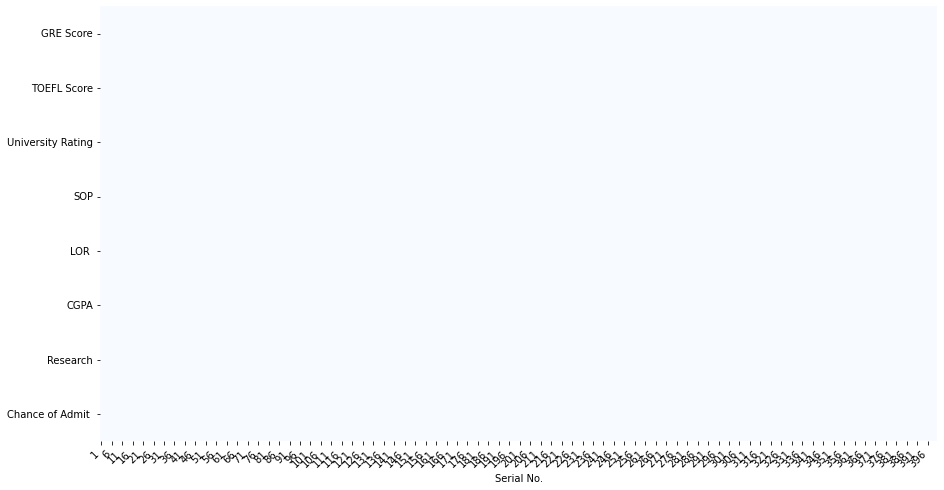

In [5]:
plot_missing_value(df)

`The dataset don't have missng value`

### Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 44.3 KB


### Data Description

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## A. Numerical Features

In [8]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.shape

(400, 8)

### Renaming columns

In [10]:
df.rename({'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating',
           'Chance of Admit ':'Chance_of_Admit', 'LOR ': 'LOR' }, axis= 1, inplace= True)

### Outlier checking

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

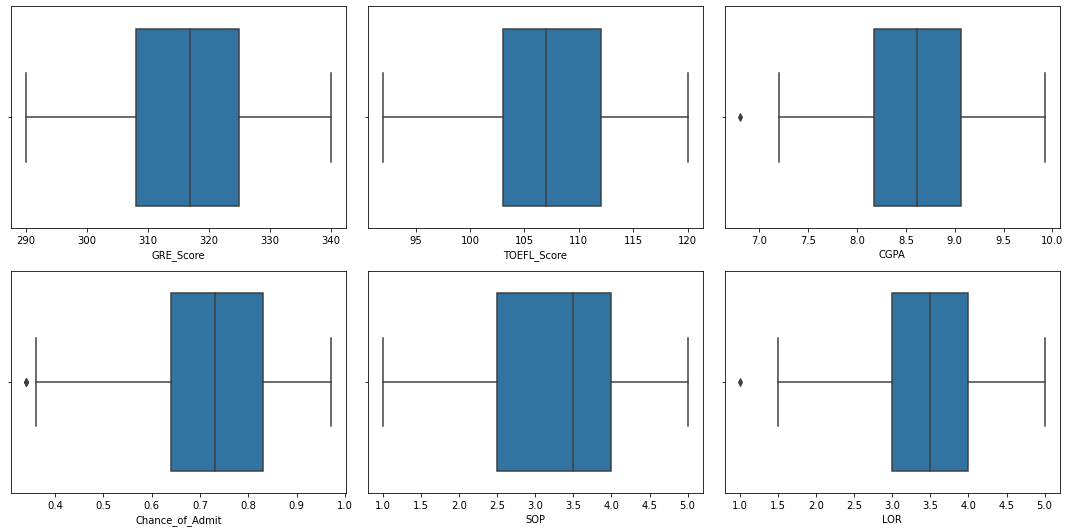

In [11]:
fig, axs = plt.subplots(2,3, figsize = (15,7.5))
sns.boxplot(df['GRE_Score'], ax = axs[0,0])
sns.boxplot(df['TOEFL_Score'], ax = axs[0,1])
sns.boxplot(df['CGPA'], ax = axs[0,2])
sns.boxplot(df['Chance_of_Admit'], ax = axs[1,0])
sns.boxplot(df['SOP'], ax = axs[1,1])
sns.boxplot(df['LOR'], ax = axs[1,2])

plt.tight_layout()
plt.show()

`Several columns have an outlier that might supposed to be like that. Thus, I don't handle them yet. But, if the model has higher value of error, I’ll handle in the evaluation part`

### Data Distribution

In [12]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

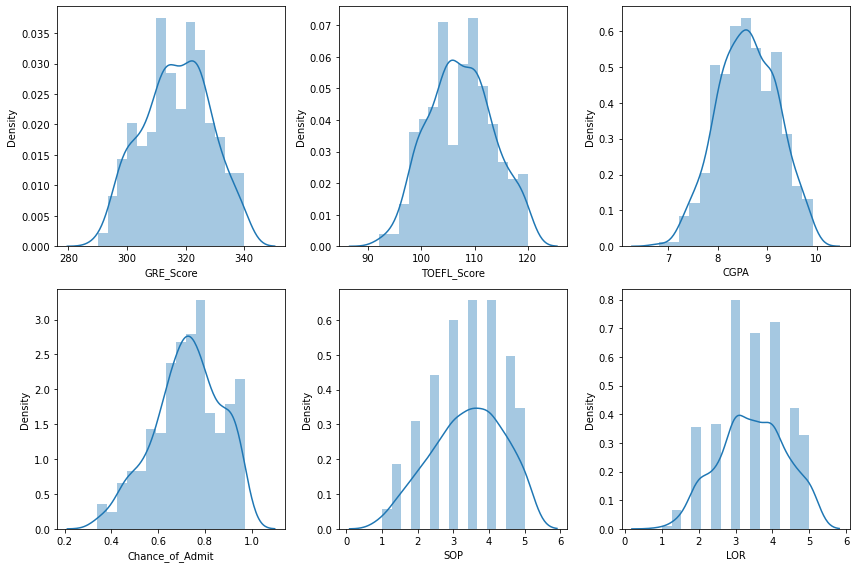

In [13]:
numeric = ['GRE_Score','TOEFL_Score','CGPA','Chance_of_Admit','SOP','LOR']

x = plt.figure(figsize=(12,8))

for i, j in enumerate (numeric):
    x.add_subplot(2, 3, i+1)
    sns.distplot(df[j], bins = 15)
    x.tight_layout()
    

plt.tight_layout()

`The columns is normally distributed`

## Numeric vs Target

### Acceptance Chance of Candidates Based on CGPA

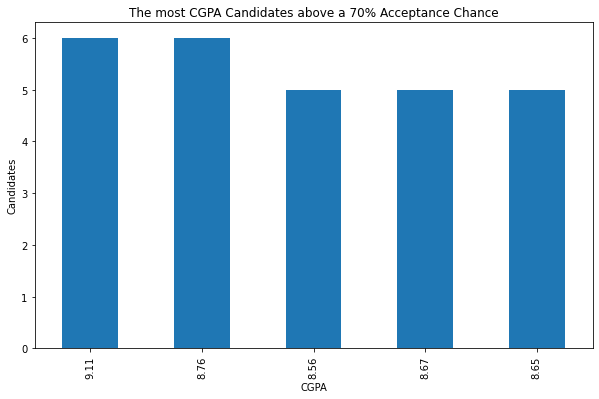

In [14]:
o = df[df["Chance_of_Admit"] > 0.70]['CGPA'].value_counts(ascending=False).head(5)
plt.title("The most CGPA Candidates above a 70% Acceptance Chance")

o.plot(kind='bar',figsize=(10, 6),linestyle='dashed',linewidth=5)
plt.xlabel("CGPA")
plt.ylabel("Candidates")
plt.show()

`The highest acceptance chance mostly candidates that have 8.76 CGPA and followed by Candidates that have 9.11 CGPA`

### Acceptance Chance of Candidates Based on GRE Score

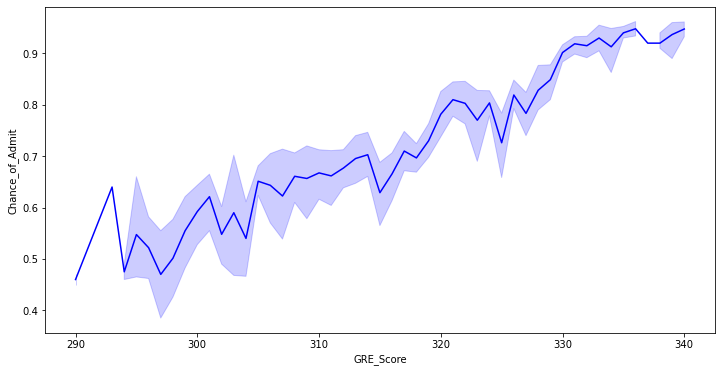

In [15]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='GRE_Score', y = 'Chance_of_Admit', color= 'b', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

`A higher GRE score have a higher chance of admit`

### Acceptance Chance of Candidates Based on TOEFL Score

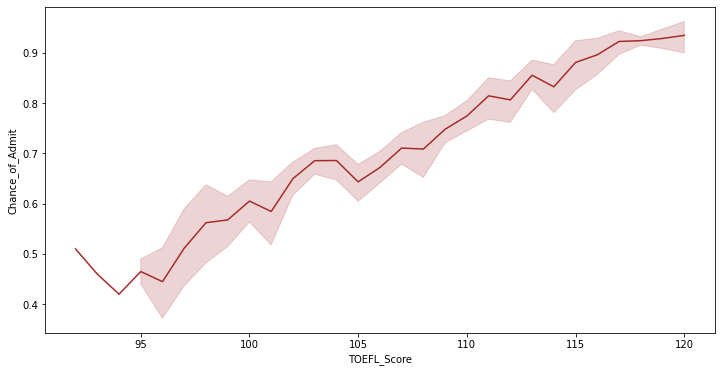

In [16]:
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='TOEFL_Score', y = 'Chance_of_Admit', color= 'brown', data=df)
plt.setp(plot.get_xticklabels(), rotation=0);

`A higher TOEFL core have a higher chance of admit`

### Acceptance Chance of Candidates Based on LOR

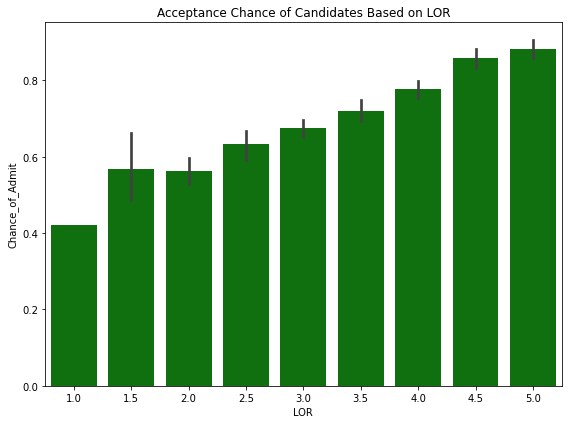

In [17]:
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='LOR', y = 'Chance_of_Admit', color= 'g', data=df)
plt.title('Acceptance Chance of Candidates Based on LOR')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.tight_layout()

### Acceptance Chance of Candidates Based on SOP

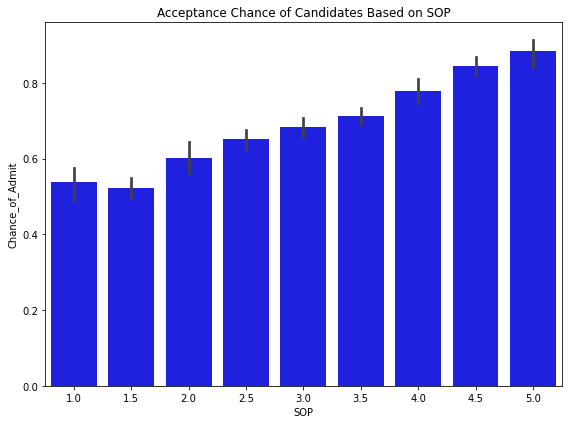

In [18]:
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='SOP', y = 'Chance_of_Admit', color= 'b', data=df)
plt.title('Acceptance Chance of Candidates Based on SOP')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.tight_layout()

## B. Categorical Features

In [19]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

### Check the Outlier of University Rating

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University_Rating'>

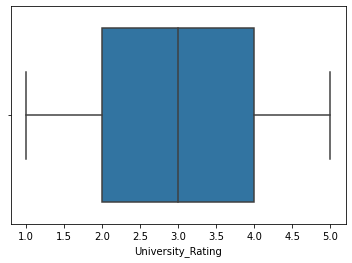

In [20]:
sns.boxplot(df['University_Rating'])

`The columns of University Rating don't have an outlier`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Research'>

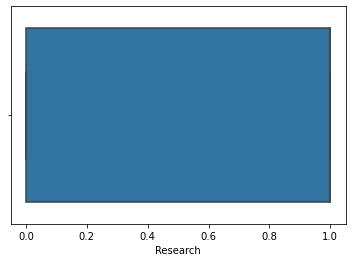

In [21]:
sns.boxplot(df['Research'])

`The columns of Research don't have an outlier`

### Data Distribution

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


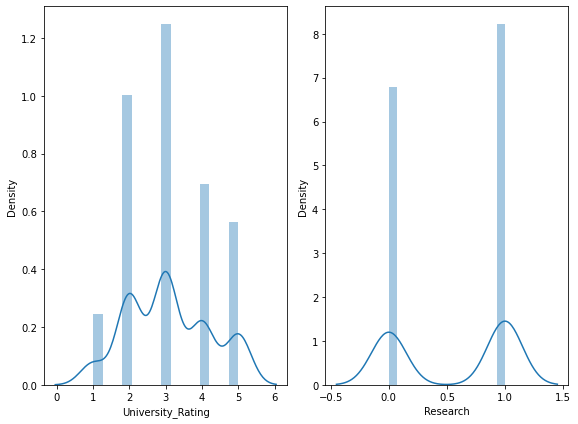

In [22]:
categoric = ['University_Rating','Research']

x = plt.figure(figsize=(12,6))

for i, j in enumerate (categoric):
    x.add_subplot(1, 3, i+1)
    sns.distplot(df[j], bins = 15)
    x.tight_layout()
    

plt.tight_layout()

`The columns is normally distributed`

## Categoric vs Target

### Acceptance Chance of Candidates Based on Rating of University

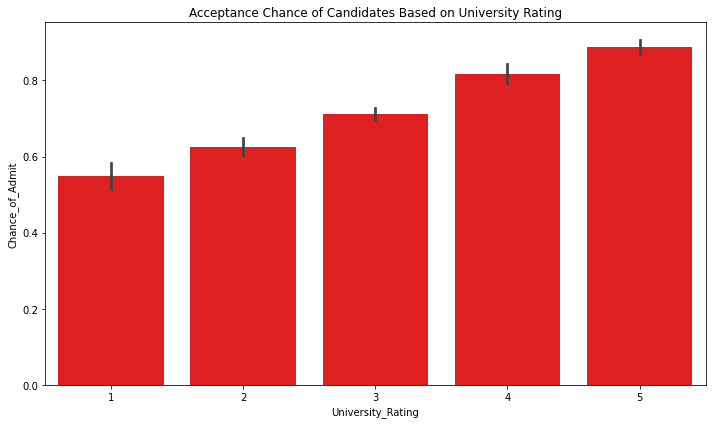

In [23]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='University_Rating', y = 'Chance_of_Admit', color= 'r', data=df)
plt.title('Acceptance Chance of Candidates Based on University Rating')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.tight_layout()

`The top University of rate has lowest chance of admit`

### Acceptance Chance of Candidates Based on Research

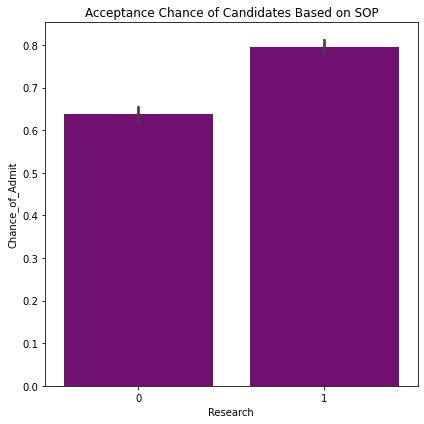

In [24]:
plt.figure(figsize=(6, 6))
plot = sns.barplot(x='Research', y = 'Chance_of_Admit', color= 'Purple', data=df)
plt.title('Acceptance Chance of Candidates Based on SOP')
plt.setp(plot.get_xticklabels(), rotation=0)
plt.tight_layout()

## Correlation Matrix (Numeric)

In [25]:
from jcopml.plot import plot_correlation_matrix, plot_association_matrix

In [26]:
plot_correlation_matrix(df,target_col='Chance_of_Admit', numeric_col=['GRE_Score','TOEFL_Score','CGPA','Chance_of_Admit','SOP','LOR'])

interactive(children=(ToggleButtons(description='method', options=('spearman', 'kendall', 'pearson', 'pearson_…

`Because Github can't display the correlation plot, I've captured a picture of it.`

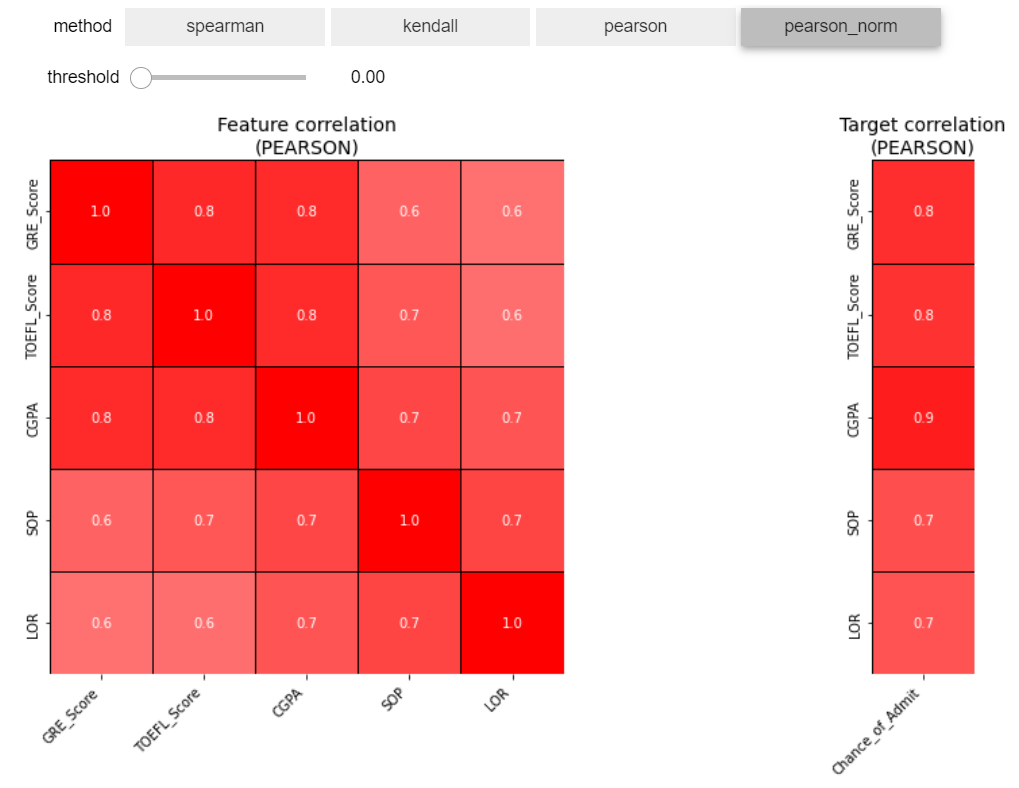

## Association Matrix (Categoric)

In [27]:
plot_association_matrix(df, target_col='Chance_of_Admit', categoric_col=categoric)

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

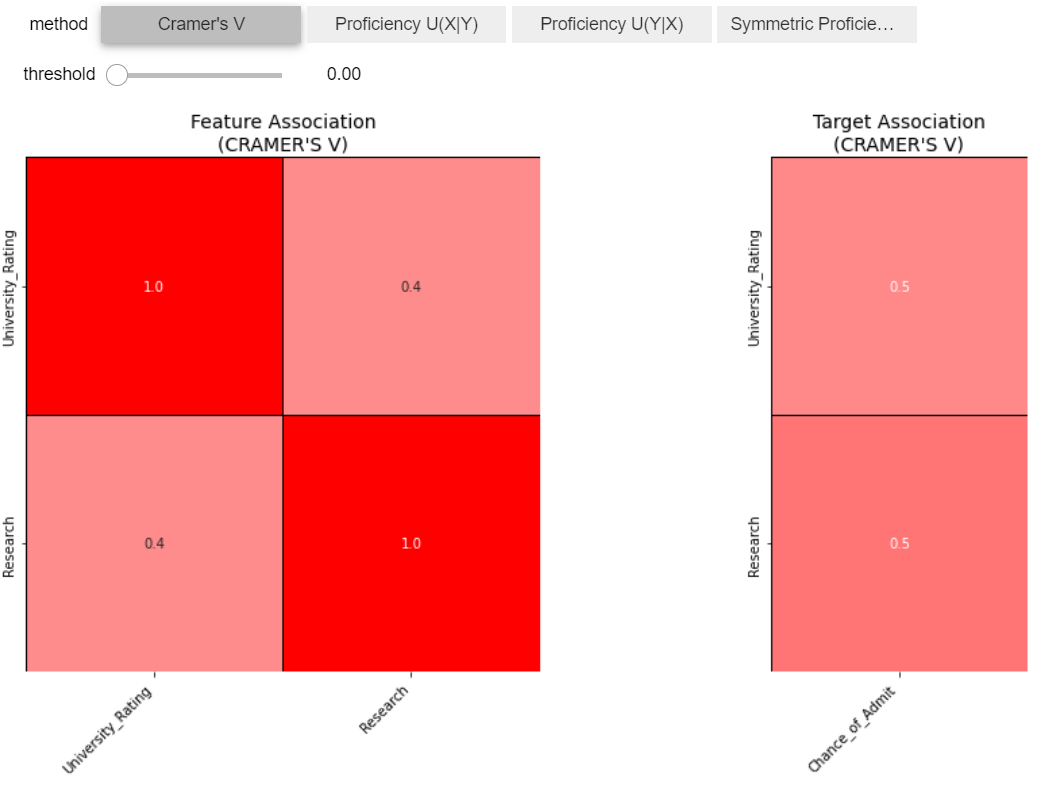

# 4. Dataset Splitting

In [28]:
X = df.drop(columns="Chance_of_Admit")
y = df.Chance_of_Admit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320,), (80,))

# 5. Modeling

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [30]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [31]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['GRE_Score','TOEFL_Score','SOP','LOR','CGPA']),
    ('categoric', cat_pipe(encoder='onehot'), ['University_Rating','Research']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.0009808478272431492, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.9868869366005175}
0.7951681423276439 0.7800742739758126 0.819808728920997


# 6. Feature Importance

`Because the dataset only have a few columns, I'll take all of columns`

# 7. Polynomial Feature

In [32]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly= 2), ['GRE_Score','TOEFL_Score','SOP','LOR','CGPA']),
    ('categoric', cat_pipe(encoder='onehot'), ['University_Rating','Research']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


model = RandomizedSearchCV(pipeline, rsp.enet_poly_params, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.0017513215594805176, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.6717006844058568, 'prep__numeric__poly__degree': 2, 'prep__numeric__poly__interaction_only': False}
0.796167123395115 0.7789825075575492 0.814007475133772


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6106947322352309, tolerance: 0.00060473746875
  model = cd_fast.enet_coordinate_descent(


`The polynomial feature has decreased test scores models rather than that don't`

# 8. Fine Tuning

In [33]:
rsp.enet_params

{'algo__fit_intercept': [True, False],
 'algo__alpha': Real(low=-4, high=2, prior='log-uniform'),
 'algo__l1_ratio': Real(low=0, high=1, prior='uniform')}

In [34]:
from jcopml.tuning.space import Integer, Real

In [35]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['GRE_Score','TOEFL_Score','SOP','LOR','CGPA']),
    ('categoric', cat_pipe(encoder='onehot'), ['University_Rating','Research']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


parameter = {'algo__fit_intercept': [True, False],
             'algo__alpha': Real(low=-4, high=2, prior='log-uniform'),
             'algo__l1_ratio': Real(low=0, high=2, prior='uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.0011122401646113, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.7951440421750449}
0.7953548139960008 0.7798047803996654 0.8202312344484988


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 0.74812115 -0.01281039  0.77947209         nan         nan  0.12960633
         nan  0.77383999  0.42618164 -0.01281039 -0.01281039 -0.01281039
  0.57151691         nan  0.60538327  0.69642239         nan  0.77837935
  0.2571642   0.70939388 -1.61166512         nan         nan  0.36890308
         nan  0.62270175  0.66075542         nan  0.25448729         nan
         nan  0.22103052  0.16140128  0.77552955         nan  0.76723468
         nan         nan         nan  0.74955572  0.77469019         nan
         nan  0.77575066         nan         nan  0.22944583         nan
  0.24512135 -0.01281039  0.53403745         nan         nan         nan
         nan         nan         nan  0.15379242         nan  0.69841733
         nan         nan  0.71279189         nan         nan  0.75853939
         nan         nan         nan         nan  0.77980478  0.484

# 9. Evaluation

In [36]:
from jcopml.plot import plot_residual
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


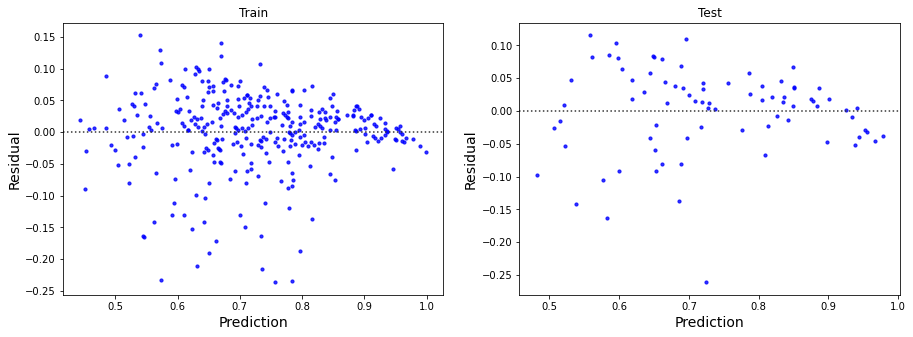

In [37]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The data spread out pretty well. But, it still can be improved by using transform with yeo-johnson`

## Checking The Error

In [38]:
df_analysis1 = X_test.copy()
df_analysis1['pred']  = model.predict(X_test)
df_analysis1['actual'] = y_test
df_analysis1['error'] = np.abs(df_analysis1.pred - df_analysis1.actual)
df_analysis1.sort_values('error', ascending=False).head(10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,pred,actual,error
Serial No.,,,,,,,,,,
10,323,108,3,3.5,3.0,8.60,0,0.723844,0.45,0.273844
375,315,105,2,2.0,2.5,7.65,0,0.583145,0.39,0.193145
95,303,99,3,2.0,2.5,7.66,0,0.538555,0.36,0.178555
43,313,107,2,2.5,2.0,8.50,1,0.685195,0.53,0.155195
377,297,96,2,2.5,2.0,7.43,0,0.482012,0.34,0.142012
94,301,97,2,3.0,3.0,7.88,1,0.577245,0.44,0.137245
40,307,108,2,4.0,3.5,7.70,0,0.600286,0.48,0.120286
16,314,105,3,3.5,2.5,8.30,0,0.653437,0.54,0.113437
117,299,102,3,4.0,3.5,8.62,0,0.661160,0.56,0.101160


## Modeling

In [39]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(transform='yeo-johnson'), ['GRE_Score','TOEFL_Score','SOP','LOR','CGPA']),
    ('categoric', cat_pipe(encoder='onehot'), ['University_Rating','Research']),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', ElasticNet())
])


parameter = {'algo__fit_intercept': [True, False],
             'algo__alpha': Real(low=-4, high=2, prior='log-uniform'),
             'algo__l1_ratio': Real(low=0, high=2, prior='uniform')}


model = RandomizedSearchCV(pipeline, parameter, cv=5,  n_iter= 150, n_jobs=-1, verbose=1, random_state=42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
{'algo__alpha': 0.004081775751416366, 'algo__fit_intercept': True, 'algo__l1_ratio': 0.33898549337218503}
0.7946843131567716 0.7817960543683159 0.8190842921718338


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ 7.76448959e-01 -1.28103859e-02  7.79812964e-01             nan
             nan -2.84841201e+01             nan  7.73580957e-01
 -5.89032389e+00 -1.28103859e-02 -1.28103859e-02 -1.28103859e-02
 -1.28103859e-02             nan -1.28103859e-02  7.80427071e-01
             nan  7.78403063e-01 -2.84841201e+01  7.74593808e-01
 -2.84841201e+01             nan             nan -2.40426667e+00
             nan -1.28103859e-02  1.28306479e-01             nan
 -2.84841201e+01             nan             nan -2.84841201e+01
 -2.84841201e+01  7.75306719e-01             nan  7.78954776e-01
             nan             nan             nan  7.73049841e-01
  7.74439438e-01             nan             nan  7.75645795e-01
             nan             nan -2.84841201e+01             nan
 -2.84841201e+01 -1.28103859e-02  4.68389072e-01             nan
             nan         

`Test scores model can improve slightly by using transform with yeo-johnson`

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


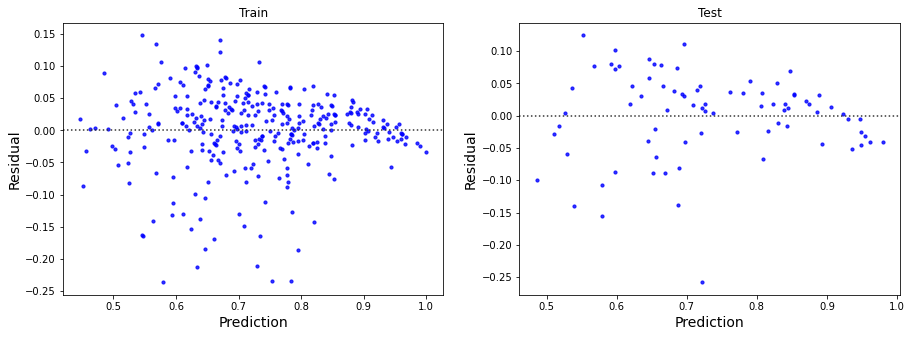

In [40]:
plot_residual(X_train, y_train, X_test, y_test, model)

`The residual plot figures out the data spread better than before`

# 10. Summary Result

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('R2 Train :', r2_score(y_train, y_pred_train))
print('R2 Test :', r2_score(y_test, y_pred_test))
print('MAE Train :', mean_absolute_error(y_train, y_pred_train))
print('MAE Test :', mean_absolute_error(y_test, y_pred_test))
print('MSE Train :', mean_squared_error(y_train, y_pred_train))
print('MSE Test :', mean_squared_error(y_test, y_pred_test))
print('RMSE Train :', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE Test :', mean_squared_error(y_test, y_pred_test, squared=False))

R2 Train : 0.7946843131567716
R2 Test : 0.8190842921718338
MAE Train : 0.04416065041632041
MAE Test : 0.04846298329921652
MSE Train : 0.00388006527363255
MSE Test : 0.004671851339829239
RMSE Train : 0.06229016995989455
RMSE Test : 0.06835094249408152


# 11. Save Model

In [43]:
save_model(model.best_estimator_, "Graduate_Admission_Prediction_ElasticNet.pkl")

Model is pickled as model/Graduate_Admission_Prediction_ElasticNet.pkl
